# Notebook to solve Q1 of the pre-camp Matlab problem set
Step 0. Load packages we will need. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Use the pandas function ``data = pd.read_excel(filename)`` to import the data. Then look at the data using ``data.head()`` and ``data.tail()``. 

    

In [3]:
data = pd.read_excel('Trip_Advisor.xlsx')

In [4]:
data.head()

,placeId,reviewNumber,userRating,userContributions,priceLevel,rating,numberOfReviews,isGreat,isFriendly,isFresh,isOk
0,342101,0.0,5.0,222.0,$$ - $$$,4.0,61,1,0,0,0
1,342102,0.0,5.0,15.0,$$ - $$$,4.0,200,0,1,0,0
2,342102,1.0,3.0,719.0,$$ - $$$,4.0,200,0,0,0,1
3,342102,2.0,4.0,185.0,$$ - $$$,4.0,200,0,0,1,1
4,342102,3.0,3.0,78.0,$$ - $$$,4.0,200,0,0,0,1


In [5]:
data.tail()

,placeId,reviewNumber,userRating,userContributions,priceLevel,rating,numberOfReviews,isGreat,isFriendly,isFresh,isOk
3337,14794088,NaN,NaN,NaN,NaN,4.0,1,0,0,0,0
3338,14801102,NaN,NaN,NaN,NaN,5.0,2,0,0,0,0
3339,14976823,NaN,NaN,NaN,NaN,5.0,1,0,0,0,0
3340,15173996,NaN,NaN,NaN,NaN,1.0,1,0,0,0,0
3341,17450101,NaN,NaN,NaN,$$ - $$$,NaN,0,0,0,0,0


# Generate indicators
Use ``data['priceLevel'].value_counts()`` to see what price ratings are in the data.


Then use ``data.loc[condition, 'Variable'] = 1`` to create indicators based on these price ratings.
    
    data.loc[data['priceLevel']=='$', 'PriceLow'] = 1 
data.loc[data['priceLevel']=='$$ - $$$', 'PriceMed'] = 1
    data.loc[data['priceLevel']=='$$$$', 'PriceHigh'] = 1

In [11]:
data['priceLevel'].value_counts()

$$ - $$$    2134
$            357
$$$$         232
Name: priceLevel, dtype: int64

In [12]:
data['noPrice'] = 0.0
data['PriceLow'] = 0.0
data['PriceMed'] = 0.0
data['PriceHigh'] = 0.0

In [13]:
data.loc[data['priceLevel']=='$', 'PriceLow'] = 1
data['PriceLow'].value_counts()

0.0    2549
1.0     357
Name: PriceLow, dtype: int64

In [14]:
data.loc[data['priceLevel']=='$$ - $$$', 'PriceMed'] = 1
data['PriceMed'].value_counts()


1.0    2134
0.0     772
Name: PriceMed, dtype: int64

In [15]:
data.loc[data['priceLevel']=='$$$$', 'PriceHigh'] = 1
data['PriceHigh'].value_counts()

0.0    2674
1.0     232
Name: PriceHigh, dtype: int64

## Cleaning
Use ``data = data[data['userRating'].notna()]`` to drop where userRating is missing.

Tip. Use ``print(data.shape[0])`` to print the number of observations before and after to see how many were dropped. 

In [16]:
print(data.shape[0])

2906


In [17]:
data = data[data['userRating'].notna()]

In [18]:
print(data.shape[0])

2906


In [19]:
data = data[data['noPrice']==0.0]

In [25]:
print(data.shape[0])

2906


# Checking your data
We can quickly check what the data looks like by doing a bar chart of the number of observations in each category. 

    data['userRating'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Bar chart of User Ratings")


<AxesSubplot:title={'center':'Bar chart of User Ratings'}>

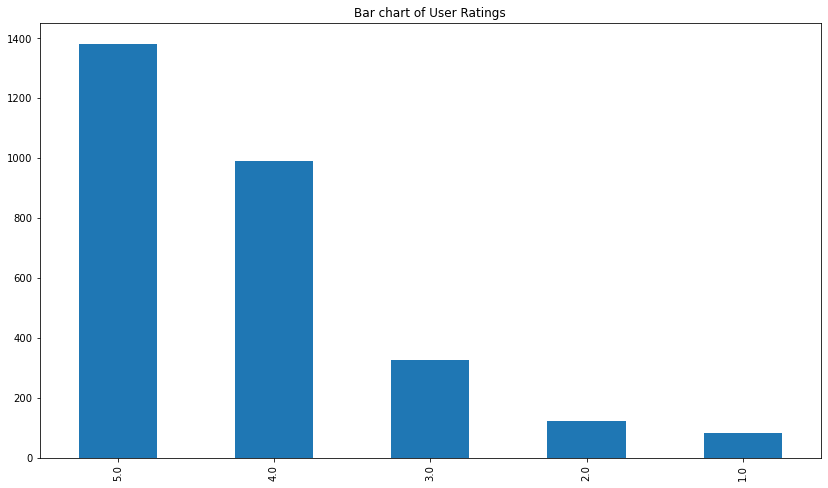

In [24]:
data['userRating'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Bar chart of User Ratings")

# Regression
We have two options for regressions. 
1. Built in function with statsmodels;
2. manual option.

In [26]:
import numpy as np
import statsmodels.api as sm

Create a varaible of ones that we'll use as a constant in regressons. 

    data['ones'] = 1.0

Next create your data

    y = data['userRating']
    x = data[['ones', 'isGreat']]

In [33]:
data['ones'] = 1.0

n = np.shape(data['ones'])[0]
print(n)

y = data['userRating']
x = data[['ones', 'isGreat']]

2906


### Manual 
We can use our knowledge of OLS to compute the regression by hand.
\begin{eqnarray}
\beta = (X'X)^{-1} X'Y
\end{eqnarray}

Use the numpy linear algebra function ``np.linalg.inv()`` and transpose ``x.T`` to compute $\beta$

In [29]:
beta = np.linalg.inv(x.T@x)@x.T@y

In [30]:
print(beta)

0    4.092344
1    0.354959
dtype: float64


We can also compute standard errors by hand using
\begin{eqnarray}
\sigma = \frac{\epsilon \epsilon '}{n-2}
\end{eqnarray}
\begin{eqnarray}
var(\beta) = \sigma(X'X)^{-1}
\end{eqnarray}

Compute the variance of your estimates and t-stats. 

In [34]:
res = y - beta[0]* x['ones']- beta[1]* x['isGreat']
sigma = res@res.T/(n-2)
print(sigma)

0.954859359707016


In [35]:
beta_var = sigma*np.linalg.inv(x.T@x)

In [36]:
print(beta_var)

[[ 0.00045687 -0.00045687]
 [-0.00045687  0.00162704]]


In [37]:
t0 = beta[0]/np.sqrt(beta_var[0,0])

In [38]:
t1 = beta[1]/np.sqrt(beta_var[1,1])

In [39]:
print(t0,t1)

191.45892857705073 8.799934176297299


### Built in
Use stats models to fit the regression and confirm your manually calcualted numbers. 

    model = sm.OLS(y, x ).fit()
    
    model.summary() # Print out the statistics
    
    predictions = model.predict(x) # make the predictions by the model

In [42]:
import statsmodels.api as sm
model = sm.OLS(y, x ).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

0       4.447304
1       4.092344
2       4.092344
3       4.092344
4       4.092344
          ...   
2901    4.092344
2902    4.447304
2903    4.447304
2904    4.092344
2905    4.092344
Length: 2906, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             userRating   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     77.44
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           2.30e-18
Time:                        21:18:34   Log-Likelihood:                -4055.3
No. Observations:                2906   AIC:                             8115.
Df Residuals:                    2904   BIC:                             8127.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones           4.0923      0.021    191.459      0.000       4.050       4.134
isGreat        0.3550      0.040      8.800      0.000       0.276       0.434
==============================================================================
Omnibus:                      623.562   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1155.061
Skew:                          -1.329   Prob(JB):                    1.52e-251
Kurtosis:                       4.574   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Plotting results 
Plot the fitted values against actual values.

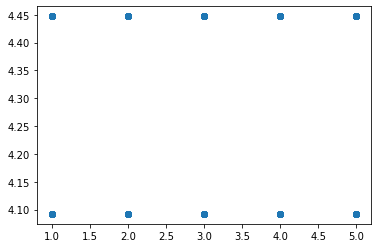

In [41]:
plt.scatter(y,predictions)

# Improving fit
Repeat this exercise, but for multiple explanatory variables. What combination is best in predicting user Ratings?